# Diferencialne enačbe

## Eulerjeva metoda

### Diferencialne enačbe prvega reda

Rešujemo enačbo naslednjega tipa

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y).$$

Iz enačbe za numerični odvod

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = \frac{y(t+h)-y(t)}{h},$$ 

vemo, da velja

$$ y(t+h) = \frac{\mathrm{d}y}{\mathrm{d}t}h + y(t).$$

Posledično lahko zapišemo:

$$ y_{n+1} = y_n + \frac{\mathrm{d}y}{\mathrm{d}t}h, $$

kar je 

$$ y_{n+1} = y_n + f(t,y_n) h.$$

### Primer: Radioaktivni razpad

$$ \dot{N} = -\lambda N,$$

kjer je $N$ število delcev, $\lambda$ pa konstanta.

Ekvivalentno,

$$ \frac{\mathrm{d}N}{\mathrm{d}t} = f(t,y) = -\lambda N $$

Analitična rešitev: 

$$ N(t)=N_0 \exp(-\lambda t) $$

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 

In [17]:
# Starting value
y = 1 # N/N0

# Number of iterations
nmax = 200

# Stepsize
h = 0.01

# Collect data
t_values = [0]
y_values = [y]

In [18]:
for i in range(1, nmax+1):
    f = -y
    y = y + f * h
    t_values.append(i*h)
    y_values.append(y)

In [19]:
y, np.exp(-nmax*h)

(0.13397967485796206, 0.1353352832366127)

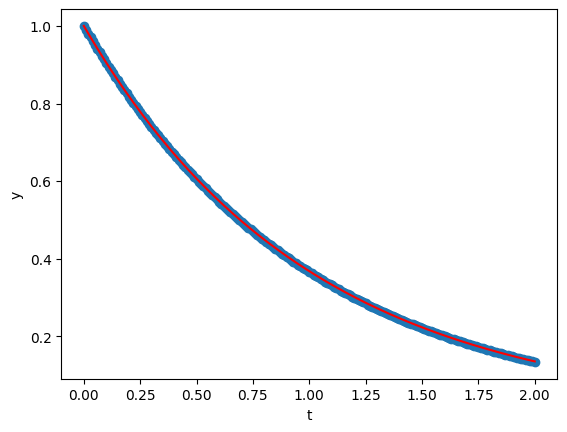

In [20]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = 1*np.exp(-test_t)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(t_values, y_values)

In [21]:
def eulerODE(f,t0,y0,nmax,h):
    # f: Function
    # t0: Starting time
    # y0: Starting value of y
    # nmax: Number of iterations
    # h: Stepsize
    y = y0
    t = t0
    t_values = [t]
    y_values = [y]
    for i in range(1, nmax+1):
        y = y + f(t,y) * h
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values])

In [22]:
# Define function
def f_ODE(t,y):
    return -y

# Call Euler method
t0 = 0
y0 = 1
nmax = 200
h = 0.01
solution = eulerODE(f_ODE, t0, y0, nmax,h)

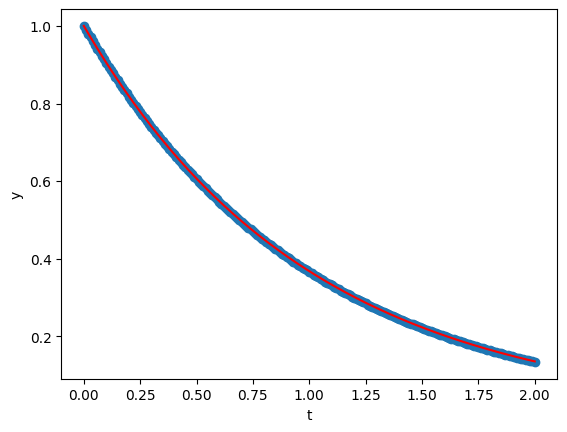

In [23]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = 1*np.exp(-test_t)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution[0], solution[1])

### Primer 2: Časovno odvisen decay

$$ \dot{y} = -ayt $$

oziroma

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -ayt $$

Analitična rešitev: 

$$ y(t)=y_0 \exp(-t^2a/2) $$

In [24]:
a = 0.01

# Define function
def f_ODE(t,y):
    return -a*y*t

# Call Euler method
t0 = 0
y0 = 1
nmax = 300
h = 0.1
solution = eulerODE(f_ODE, t0, y0, nmax,h)

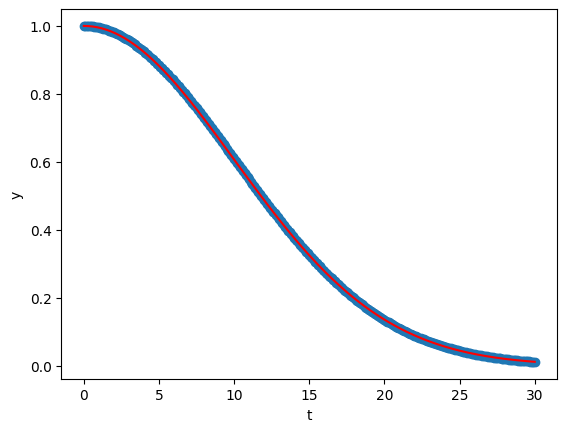

In [25]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2*a/2)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution[0], solution[1])

## Diferencialne enačbe višjega reda

Primer: Diferencialna enačba drugega reda: 

$$ y''(t) = f\left(t,y(t),y'(t)\right) $$

Uvedemo:

$$ z_0(t) = y(t)$$

in 

$$ z_1(t) = y'(t).$$

Torej

$$ \begin{pmatrix}z_0'(t)\\z_1'(t)\end{pmatrix}=\begin{pmatrix}z_1(t)\\f\left(t,z_0(t),z_1(t)\right)\end{pmatrix} $$

Diferencialno enačbo drugega reda lahko torej zapišemo kot skupek dveh diferencialnih enačb prvega reda. Obe lahko rešimo z Eulerjevo metodo.

$$ z_0^{(n+1)} = z_0^{(n)} + z_1^{(n)} h $$

$$ z_1^{(n+1)} = z_1^{(n)} + f\left(t,z_0^{(n)},z_1^{(n)}\right) h $$

Oziroma, z začetno konvencijo označevanja spremenljivk

$$ y_{n+1} = y_{n} + y'_{n} h $$

$$ y'_{n+1} = y'_{n} + f\left(t,y_{n},y'_{n}\right) h $$

In [26]:
def eulerODE2(f,t0,y00,y10,nmax,h):
    # f: Function
    # t0: Starting time
    # y00: Starting value of y(t)
    # y10: Starting value of y'(t)
    # nmax: Number of iterations
    # h: Stepsize
    y0 = y00
    y1 = y10
    t = t0
    t_values = [t]
    y0_values = [y0]
    y1_values = [y1]
    for i in range(1, nmax+1):
        y0 = y0 + y1 * h
        y1 = y1 + f(t,y0,y1) * h
        t = t + h
        t_values.append(t)
        y0_values.append(y0)
        y1_values.append(y1)
    return np.array([t_values, y0_values, y1_values])

### Primer: Prosti pad

$$ \ddot{y} = -g $$

ozrioma

$$ \frac{\mathrm{d}^2y}{\mathrm{d}t^2} = f(t,y,\dot{y}) = -g$$

Analitična rešitev: 

$$ y(t)=-\frac{g}{2}t^2+v_0t+y_0 $$

In [27]:
g = 9.81

def f_ODE(t,y0,y1):
    return -g

t0 = 0
y00 = 10
y10 = 50
nmax = 100
h = 0.1

solution = eulerODE2(f_ODE,t0,y00,y10,nmax,h)

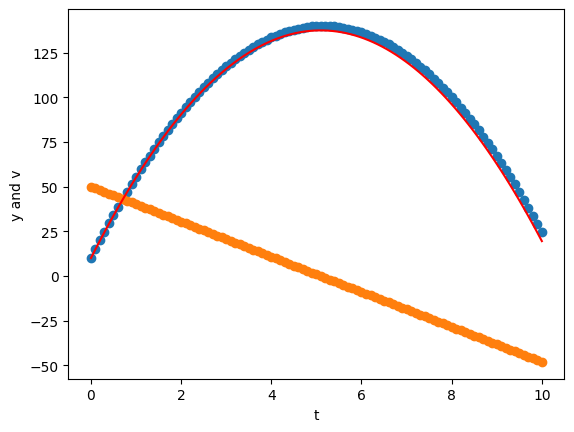

In [28]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = -g/2*test_t**2 + y10*test_t + y00
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y and v')
plt.scatter(solution[0], solution[1])
plt.scatter(solution[0], solution[2])

### Primer: Harmonski oscilator

$$ \theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0 $$

Kjer je $ b $ koeficient dušenja, $ c $ pa je določen z dolžino nihala $ c = \frac{g}{l} $.

#### Brez dušenja

In [29]:
# geometrija
length = 2
c = 9.81/length

# dušenje
b = 0

def f_ODE(t,theta0,theta1):
    return -b*theta1 -c*theta0

t0 = 0
theta00 = 0.2
theta10 = 0
nmax = 200
h = 0.1

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

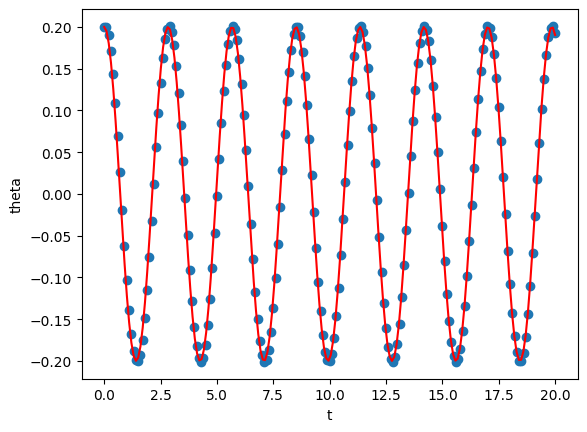

In [30]:
test_t = np.linspace(0, nmax*h, nmax)
test_theta = theta00*np.cos(np.sqrt(9.81/length)*test_t)
plt.plot(test_t, test_theta, 'red')

plt.xlabel('t')
plt.ylabel('theta')
plt.scatter(solution[0], solution[1])

#### Z dušenjem

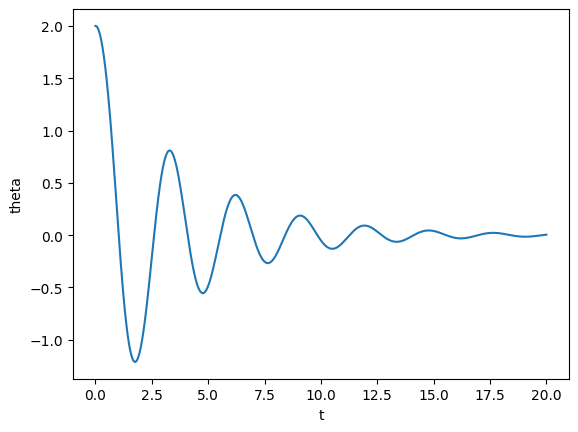

In [31]:
# Geometrija
length = 2
c = 9.81/length

# Dušenje
b = 0.5

def f_ODE(t,theta0,theta1):
    return -b*theta1 -c*np.sin(theta0)

t0 = 0
theta00 = 2.0
theta10 = 0
nmax = 2000
h = 0.01

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

plt.xlabel('t')
plt.ylabel('theta')
plt.plot(solution[0], solution[1])

# Solvers

In [33]:
a = 0.01

def f_ODE(t,y):
    return -a*y*t

nmax = 300
y0 = 1
h = 0.1

In [34]:
solution_RK45 = integrate.solve_ivp(f_ODE, [0,30], [1], method = 'RK45')

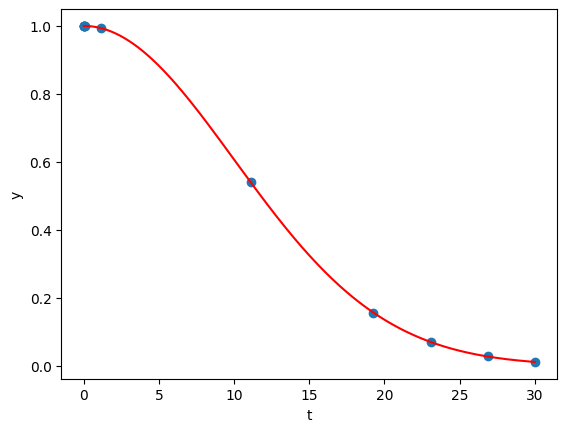

In [35]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2 * a/2)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')

plt.scatter(solution_RK45.t, solution_RK45.y)

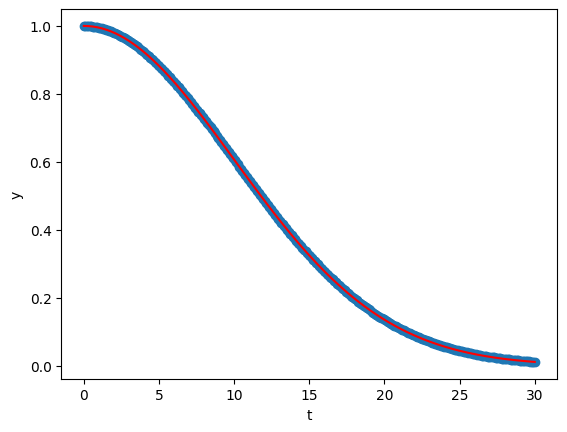

In [37]:
solution_RK45 = integrate.solve_ivp(f_ODE, [0,30], [1], method = 'RK45', t_eval = np.linspace(0,h*nmax,nmax))
test_t = np.linspace(0, h*nmax, nmax)
test_y = y0*np.exp(-test_t**2 * a/2)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')

plt.scatter(solution_RK45.t, solution_RK45.y)

### Prosti pad

In [38]:
g = 9.81

def f_ODE(t,y):
    return y[1], -g

y0 = 10
v0 = 50

solution_RK45 = integrate.solve_ivp(f_ODE, [0,10], [y0, v0], method = 'RK45', t_eval = np.linspace(0,10,101))

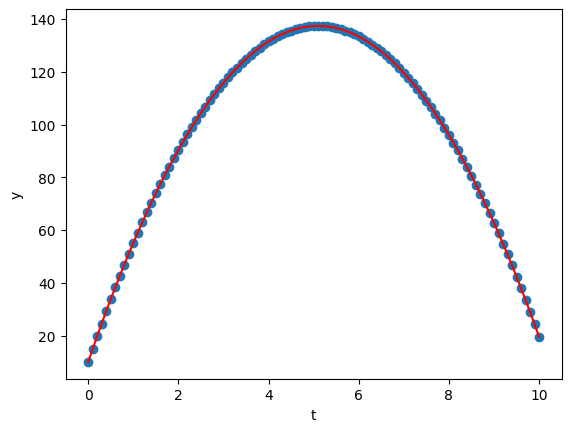

In [39]:
test_t = np.linspace(0, 10, 101)
test_y = -g/2*test_t**2 + y10*test_t + y00
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')

plt.scatter(solution_RK45.t, solution_RK45.y[0])